# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from nltk import FreqDist
from wordcloud import WordCloud
from collections import Counter
from nltk.collocations import BigramCollocationFinder, TrigramCollocationFinder
from nltk.metrics import BigramAssocMeasures, TrigramAssocMeasures
from nltk import pos_tag, ne_chunk
from textblob import TextBlob

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split, RepeatedStratifiedKFold
from sklearn.preprocessing import LabelEncoder

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim.downloader as api

from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Basic Data Exploration

In [3]:
# Load the dataset
data = pd.read_csv('data.csv')

In [4]:
data.head()

,headline,reviewBody,ratingValue
0,Super light and efficient laptop,Super light and efficient laptop. Crisp & cle...,5.0
1,NEW laptop is great,so far I am loving the new look and the feel o...,5.0
2,Lightweight powerhouse.,Great build quality \ excellent screen \ very ...,5.0
3,Great Laptop for Work,Excellent laptop for work. Processor was able ...,5.0
4,Practical Solid Laptop,"So far so good, I like it has an HDMI, USB-C &...",5.0


In [5]:
data.shape

(325, 3)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   headline     325 non-null    object 
 1   reviewBody   325 non-null    object 
 2   ratingValue  319 non-null    float64
dtypes: float64(1), object(2)
memory usage: 7.7+ KB


In [7]:
data.describe()

,ratingValue
count,319.00000
mean,4.37931
std,1.08608
min,1.00000
25%,4.00000
50%,5.00000
75%,5.00000
max,5.00000


In [8]:
### Checking the Null Values
data.isnull().sum()

headline       0
reviewBody     0
ratingValue    6
dtype: int64

In [9]:
# Check for any duplicates
has_duplicates = data.duplicated().any()
print(has_duplicates)

True


In [10]:
# Count the number of duplicated rows
duplicate_count = data.duplicated().sum()
print("Number of duplicated rows:", duplicate_count)

Number of duplicated rows: 19


In [11]:
# Remove duplicated rows and update df
data = data.drop_duplicates()

In [12]:
###Drop Nan Values
data=data.dropna()

In [13]:
# Converting the rating to integer
data['ratingValue'] = data['ratingValue'].astype(int)

In [14]:
data['ratingValue'].unique()

array([5, 4, 3, 2, 1])

In [15]:
data.head()

,headline,reviewBody,ratingValue
0,Super light and efficient laptop,Super light and efficient laptop. Crisp & cle...,5
1,NEW laptop is great,so far I am loving the new look and the feel o...,5
2,Lightweight powerhouse.,Great build quality \ excellent screen \ very ...,5
3,Great Laptop for Work,Excellent laptop for work. Processor was able ...,5
4,Practical Solid Laptop,"So far so good, I like it has an HDMI, USB-C &...",5


# Text Preprocessing

In [16]:
# Separate features
X = data['headline'] + ' ' + data['reviewBody']  # Combine headline and reviewBody
y = data['ratingValue']

In [17]:
messages=X.copy()

In [18]:
messages.head()

0    Super light and efficient laptop Super light a...
1    NEW laptop is great so far I am loving the new...
2    Lightweight powerhouse. Great build quality \ ...
3    Great Laptop for Work Excellent laptop for wor...
4    Practical Solid Laptop So far so good, I like ...
dtype: object

In [19]:
from nltk.stem import WordNetLemmatizer
import re
from nltk.corpus import stopwords

# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()
corpus = []
for i in range(len(messages)):
    # Remove non-alphabetic characters and convert to lowercase
    review = re.sub('[^a-zA-Z]', ' ', messages[i])
    review = review.lower()
    review = review.split()
    # Lemmatization
    review = [lemmatizer.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [20]:
corpus

['super light efficient laptop super light efficient laptop crisp clean screen easier handle fast execution apps program',
 'new laptop great far loving new look feel new laptop',
 'lightweight powerhouse great build quality excellent screen good port option keyboard quality comfortable type trackpad feel responsive accurate weight laptop outstanding perfect daily work commute',
 'great laptop work excellent laptop work processor able handle workload better current laptop',
 'practical solid laptop far good like hdmi usb c port instead usb c port power adapter lighter expecting laptop good size weight screen image look sharp using work travel think work great',
 'good choice light weight like touch keyboard',
 'like laptop really like laptop light fast',
 'great portable laptop excellent around package great size nice design well built staff happy new device',
 'feel like quality fast feel like quality construction phenomenal aluminum mouse amazing unit fast speced unit gb ram tb ssd a

# Exploratory Data Analysis(EDA)

In [21]:
# Tokenization and Word Frequency Analysis
all_words = ' '.join(corpus)  # Join all reviews into a single string
tokens = word_tokenize(all_words)  # Tokenize into individual words
freq_dist = FreqDist(tokens)  # Calculate frequency distribution

### Count of Ratings(Sentiments)

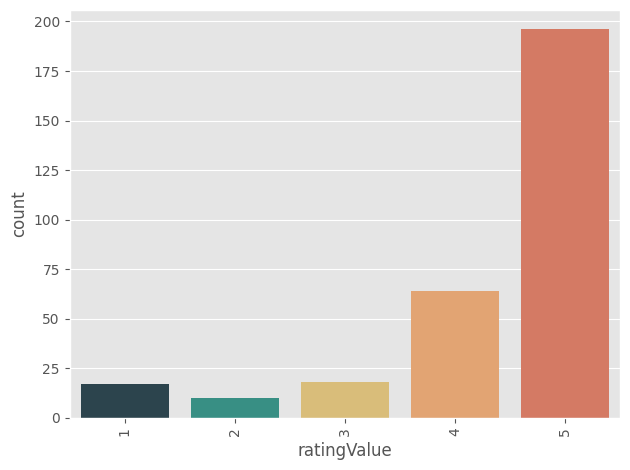

In [22]:
custom_palette = ["#264653", "#2a9d8f", "#e9c46a", "#f4a261", "#e76f51"]
ax = sns.countplot(x="ratingValue", data=data, palette=custom_palette)
# Rotate the x-axis labels to 90 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

### Word Cloud

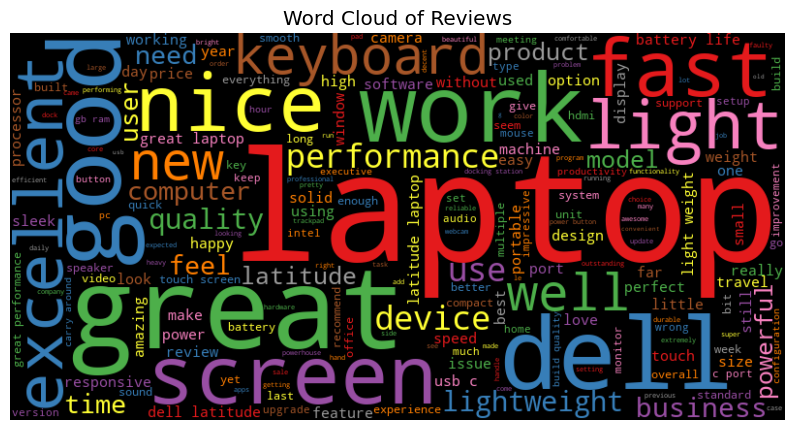

In [24]:
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Set1').generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

### Word Length Distribution

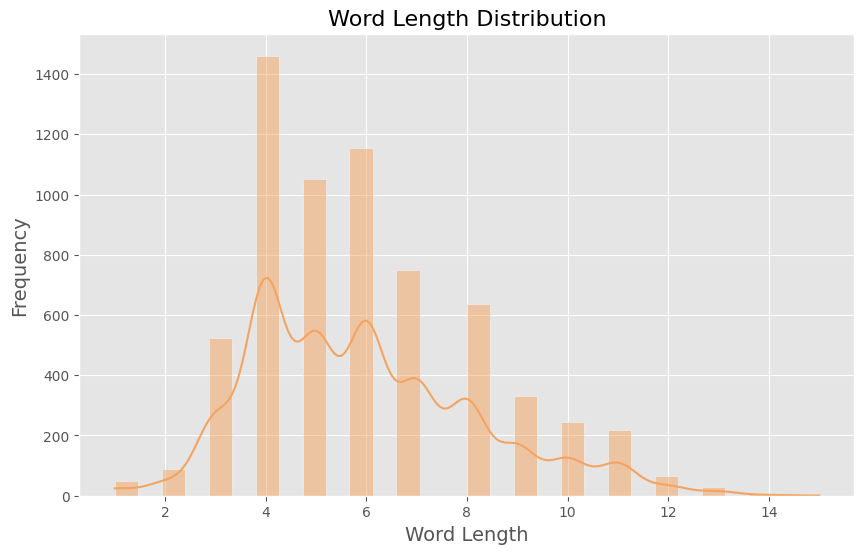

In [25]:
word_lengths = [len(word) for word in tokens]

plt.figure(figsize=(10, 6))
sns.histplot(word_lengths, bins=30, kde=True, color = "sandybrown")
plt.title('Word Length Distribution', fontsize=16)
plt.xlabel('Word Length', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)

plt.show()

### Sentiment Analysis using TextBlob

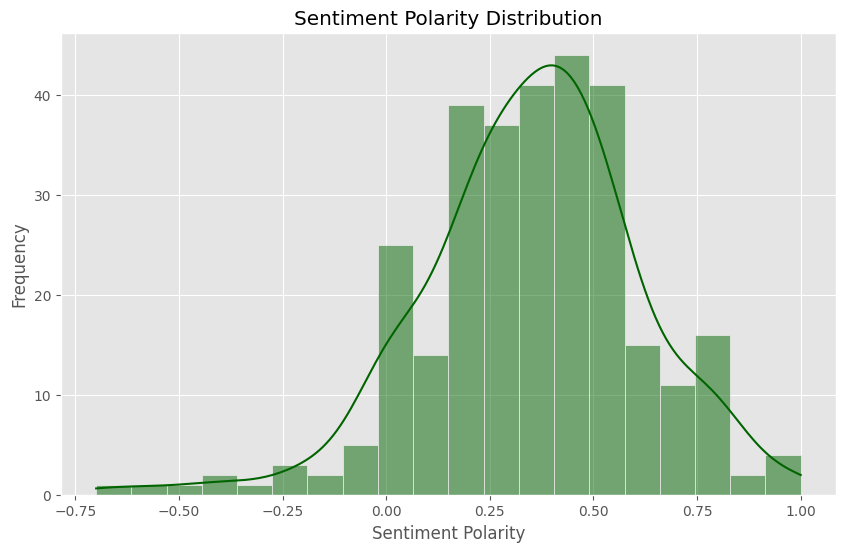

In [26]:
sentiments = [TextBlob(review).sentiment.polarity for review in corpus]

plt.figure(figsize=(10, 6))
sns.histplot(sentiments, bins=20, kde=True, color = "darkgreen")
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

### Analysis of text structure (paragraph lengths) within reviews

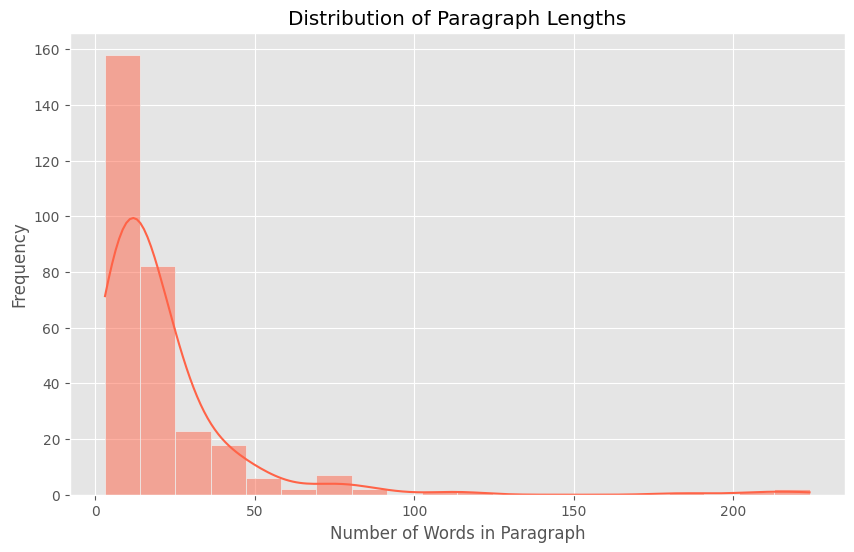

In [27]:
paragraph_lengths = [len(paragraph.split()) for review in corpus for paragraph in review.split('\n') if paragraph.strip()]

plt.figure(figsize=(10, 6))
sns.histplot(paragraph_lengths, bins=20, kde=True, color="tomato")
plt.title('Distribution of Paragraph Lengths')
plt.xlabel('Number of Words in Paragraph')
plt.ylabel('Frequency')
plt.show()

### Unique Words per Review

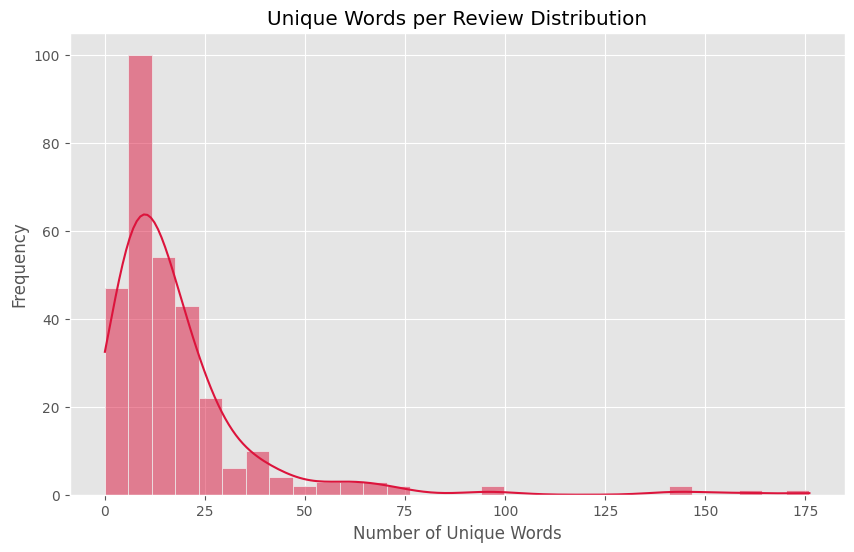

In [28]:
unique_words_per_review = [len(set(review.split())) for review in corpus]

plt.figure(figsize=(10, 6))
sns.histplot(unique_words_per_review, bins=30, kde=True, color="crimson")
plt.title('Unique Words per Review Distribution')
plt.xlabel('Number of Unique Words')
plt.ylabel('Frequency')
plt.show()

### Common Stopwords

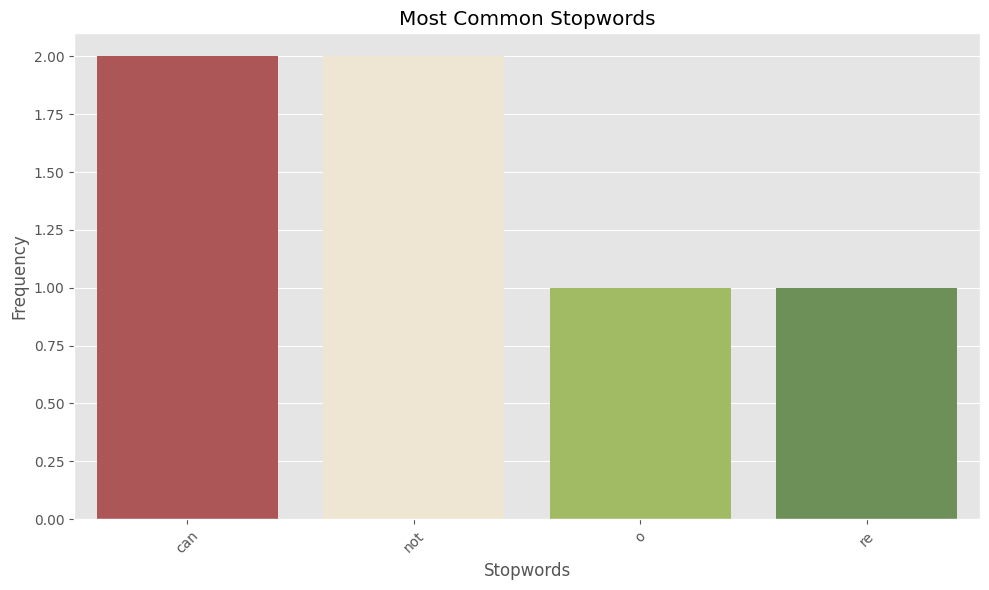

In [29]:
stop_words = set(stopwords.words('english'))
stopword_count = Counter(word for word in tokens if word in stop_words)

custom_palette = ['#bc4749', '#f2e8cf', '#a7c957', '#6a994e']

plt.figure(figsize=(10, 6))
sns.barplot(x=[word for word, _ in stopword_count.most_common(20)],
            y=[count for _, count in stopword_count.most_common(20)],
            palette=custom_palette)
plt.title('Most Common Stopwords')
plt.xlabel('Stopwords')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Bigram and Trigram Analysis

In [30]:
bigram_finder = BigramCollocationFinder.from_words(tokens)
trigram_finder = TrigramCollocationFinder.from_words(tokens)

In [31]:
# Top 20 Bigrams
print("\nTop 20 Bigrams:")
print(bigram_finder.nbest(BigramAssocMeasures.likelihood_ratio, 20))

# Top 20 Trigrams
print("\nTop 20 Trigrams:")
print(trigram_finder.nbest(TrigramAssocMeasures.likelihood_ratio, 20))


Top 20 Bigrams:
[('battery', 'life'), ('usb', 'c'), ('dell', 'latitude'), ('docking', 'station'), ('light', 'weight'), ('carry', 'around'), ('gb', 'ram'), ('th', 'gen'), ('c', 'port'), ('touch', 'screen'), ('power', 'button'), ('build', 'quality'), ('thus', 'far'), ('facial', 'recognition'), ('dead', 'arrival'), ('wi', 'fi'), ('easy', 'carry'), ('value', 'money'), ('highly', 'recommend'), ('form', 'factor')]

Top 20 Trigrams:
[('usb', 'c', 'port'), ('battery', 'life', 'long'), ('impressed', 'battery', 'life'), ('mark', 'battery', 'life'), ('regarding', 'battery', 'life'), ('battery', 'life', 'consistently'), ('battery', 'life', 'help'), ('phenomenal', 'battery', 'life'), ('increase', 'battery', 'life'), ('battery', 'life', 'ease'), ('ease', 'battery', 'life'), ('heat', 'battery', 'life'), ('great', 'battery', 'life'), ('battery', 'life', 'complaint'), ('battery', 'life', 'highly'), ('exceptional', 'battery', 'life'), ('battery', 'life', 'pretty'), ('battery', 'life', 'fast'), ('batter

### POS Tags

In [32]:
# Part-of-Speech (POS) Tagging
pos_tags = pos_tag(tokens)

In [33]:
# Count POS tags
pos_counts = Counter(tag for word, tag in pos_tags)
print("\nPOS Tag Counts:")
print(pos_counts)


POS Tag Counts:
Counter({'NN': 2857, 'JJ': 1940, 'RB': 483, 'VBG': 238, 'VBD': 205, 'VBP': 189, 'VBN': 153, 'IN': 114, 'VB': 109, 'NNS': 62, 'VBZ': 46, 'JJR': 38, 'JJS': 36, 'CD': 36, 'MD': 35, 'RBR': 20, 'DT': 14, 'FW': 11, 'NNP': 9, 'CC': 6, 'RP': 3, 'TO': 1, 'RBS': 1, 'WRB': 1})


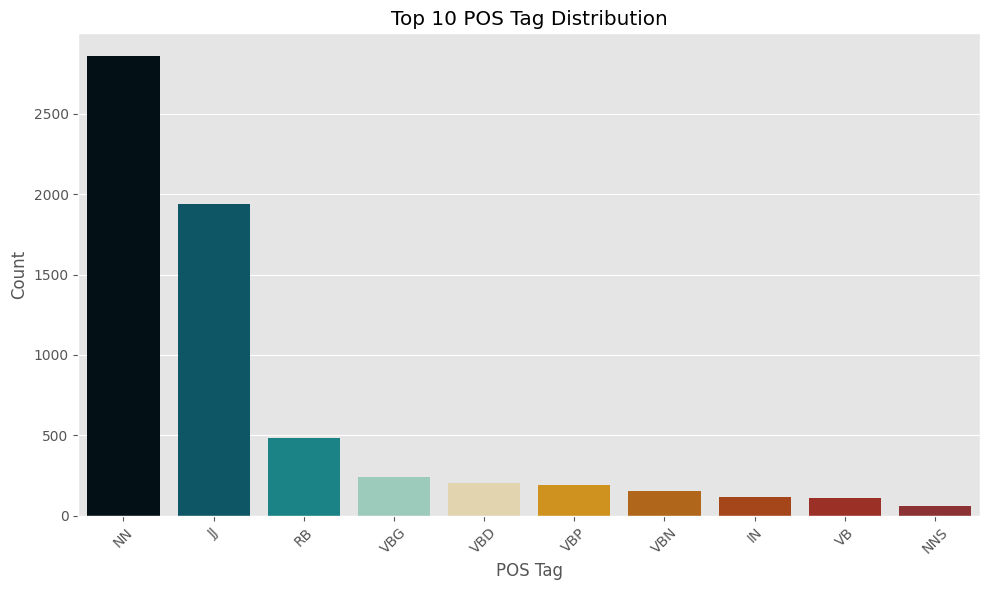

In [34]:
pos_counts_df = pd.DataFrame(pos_counts.items(), columns=['POS Tag', 'Count'])
pos_counts_df = pos_counts_df.sort_values(by='Count', ascending=False).head(10)
custom_palette = ['#001219', '#005f73', '#0a9396', '#94d2bd', '#e9d8a6', "#ee9b00", "#ca6702", "#bb3e03", "#ae2012", "#9b2226"]
plt.figure(figsize=(10, 6))
sns.barplot(data=pos_counts_df, x='POS Tag', y='Count', palette=custom_palette)
plt.title('Top 10 POS Tag Distribution')
plt.xlabel('POS Tag')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()

### Lexical Diversity

In [35]:
num_tokens = len(tokens)
num_types = len(set(tokens))
lexical_diversity = num_types / num_tokens
print("\nLexical Diversity (Type-Token Ratio):", lexical_diversity)


Lexical Diversity (Type-Token Ratio): 0.24368094445285304


### Analysis of Textual Entropy

In [36]:
# Analysis of Textual Entropy (Shannon entropy)
from scipy.stats import entropy
from collections import Counter

# Calculate Shannon entropy for the corpus
word_counts = Counter(all_words)
total_words = sum(word_counts.values())
word_probabilities = [count / total_words for count in word_counts.values()]
entropy_score = entropy(word_probabilities)

print(f"Shannon entropy of the corpus: {entropy_score}")

Shannon entropy of the corpus: 2.923370523510679


**Computes the Shannon entropy of the corpus to measure the unpredictability or information content of the text**

### Analysis of Sentences with Negation

In [37]:
# Example: Identify sentences with negations
sentences_with_negations = [sent for review in corpus for sent in nltk.sent_tokenize(review) if 'not ' in sent]

# Print some examples of sentences with negations
print("Examples of sentences with negations:")
for idx, sent in enumerate(sentences_with_negations[:5]):
    print(f"{idx+1}. {sent}")

Examples of sentences with negations:
1. light weight latitude laptop light weight snazzy looking sale person travel customer keyboard feel flow pretty nicely sometimes hit power button pinky meaning hit delete key next delete key get annoyance get used yet using week far cannot complain happy
2. log unable log department week still cannot use


### Contextual Word Usage (Concordance)

In [38]:
from nltk.text import Text

# Convert corpus into NLTK Text object
text = Text(tokens)

# Print concordance for a specific word (e.g., 'good')
print("Concordance for 'good':")
text.concordance('good', lines=10)

Concordance for 'good':
Displaying 10 of 84 matches:
great build quality excellent screen good port option keyboard quality comfort
nt laptop practical solid laptop far good like hdmi usb c port instead usb c p
wer adapter lighter expecting laptop good size weight screen image look sharp 
p using work travel think work great good choice light weight like touch keybo
got configured gb ram camera quality good much better laptop year ago exceptio
ed mobility new lightweight portable good battery experience take little getti
rocessing great graphic compact size good touch tablet capability rip graphic 
ll well build laptop would recommend good update current inch range perfect co
 work set plugged time build quality good felt frame flex key good tactile fee
ild quality good felt frame flex key good tactile feel thunderbolt port work g


# Sentiment Analysis

In [39]:
import spacy

In [40]:
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [41]:
afinn.head() 

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


#### Now let's take our corpus

In [42]:
corpus

['super light efficient laptop super light efficient laptop crisp clean screen easier handle fast execution apps program',
 'new laptop great far loving new look feel new laptop',
 'lightweight powerhouse great build quality excellent screen good port option keyboard quality comfortable type trackpad feel responsive accurate weight laptop outstanding perfect daily work commute',
 'great laptop work excellent laptop work processor able handle workload better current laptop',
 'practical solid laptop far good like hdmi usb c port instead usb c port power adapter lighter expecting laptop good size weight screen image look sharp using work travel think work great',
 'good choice light weight like touch keyboard',
 'like laptop really like laptop light fast',
 'great portable laptop excellent around package great size nice design well built staff happy new device',
 'feel like quality fast feel like quality construction phenomenal aluminum mouse amazing unit fast speced unit gb ram tb ssd a

In [43]:
sent_df = pd.DataFrame(corpus, columns=['reviews'])
sent_df

,reviews
0,super light efficient laptop super light effic...
1,new laptop great far loving new look feel new ...
2,lightweight powerhouse great build quality exc...
3,great laptop work excellent laptop work proces...
4,practical solid laptop far good like hdmi usb ...
...,...
300,faulty motherboard dell sent laptop faulty mot...
301,dead arrival laptop dead arrival still waiting...
302,bad quality bad quality overheating keyboard t...
303,hassle installation win laptop come required s...


In [44]:
affinity_scores = afinn.set_index('word')['value'].to_dict() 

In [45]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score 

In [46]:
# test that it works
calculate_sentiment(text = 'amazing') 

4

In [47]:
# test2 that it works
calculate_sentiment(text = 'abandon') 

-2

In [48]:
sent_df['sentiment_value'] = sent_df['reviews'].apply(calculate_sentiment) 

In [49]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['reviews'].str.split().apply(len)
sent_df['word_count'].head(10) 

0    17
1    10
2    25
3    13
4    32
5     7
6     7
7    16
8    31
9    12
Name: word_count, dtype: int64

In [50]:
sent_df 

,reviews,sentiment_value,word_count
0,super light efficient laptop super light effic...,8,17
1,new laptop great far loving new look feel new ...,6,10
2,lightweight powerhouse great build quality exc...,21,25
3,great laptop work excellent laptop work proces...,6,13
4,practical solid laptop far good like hdmi usb ...,13,32
...,...,...,...
300,faulty motherboard dell sent laptop faulty mot...,0,7
301,dead arrival laptop dead arrival still waiting...,-6,8
302,bad quality bad quality overheating keyboard t...,-6,8
303,hassle installation win laptop come required s...,4,10


In [51]:
sent_df.sort_values(by='sentiment_value').tail(10) 

,reviews,sentiment_value,word_count
51,promised good far delivery communication timin...,22,31
165,portable powerhouse dell latitude perfect blen...,22,111
100,outstanding laptop far far laptop working grea...,22,32
56,solid build good performance overall build lap...,24,73
137,well designed powerful compact laptop laptop t...,26,59
240,one best work computer made dell power efficie...,28,79
127,excellent laptop exceptional battery life lapt...,31,206
217,decent device well built powerful review lapto...,32,184
50,dell amazing brilliance dell unleashing produc...,42,215
149,dell latitude solid system recently purchased ...,66,224


In [52]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe() 

count    305.000000
mean       6.727869
std        7.031979
min       -8.000000
25%        3.000000
50%        6.000000
75%        9.000000
max       66.000000
Name: sentiment_value, dtype: float64

In [53]:
# Sentiment score of the whole review
# Negative 
sent_df[sent_df['sentiment_value']<0].head() 

,reviews,sentiment_value,word_count
213,okay product okay first week open excel hang h...,-2,22
243,lightweight portable necessary port usb c port...,-1,41
247,ergonomic review usb c port hdmi port left sid...,-1,11
253,laptop review super laptop fast bit trouble ca...,-3,17
271,laptop great ordering process went wrong purch...,-1,27


In [54]:
Negative = sent_df[sent_df['sentiment_value']<0].shape
Negative

(14, 3)

In [55]:
# Neutral 
sent_df[sent_df['sentiment_value']==0].head() 

,reviews,sentiment_value,word_count
26,light weight latitude laptop light weight snaz...,0,40
28,greate greate business laptop feature required,0,6
29,new device company use working explained rep,0,7
42,,0,0
61,dell lightweight compact respectable performan...,0,6


In [56]:
Neutral = sent_df[sent_df['sentiment_value']==0].shape
Neutral

(27, 3)

In [57]:
# Positive 
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0].head() 

,reviews,sentiment_value,word_count
0,super light efficient laptop super light effic...,8,17
1,new laptop great far loving new look feel new ...,6,10
2,lightweight powerhouse great build quality exc...,21,25
3,great laptop work excellent laptop work proces...,6,13
4,practical solid laptop far good like hdmi usb ...,13,32


In [58]:
Positive = sent_df[sent_df['sentiment_value']>0].shape 
Positive 

(264, 3)

In [59]:
# Define mapping from ratings to sentiments
def map_to_sentiment(sentiment_value):
    if sentiment_value > 0:
        return 'Positive'
    elif sentiment_value == 0:
        return 'Neutral'
    elif sentiment_value < 0:
        return  'Negative'

In [60]:
# Apply mapping to create 'sentiment' column
sent_df['sentiment'] = sent_df['sentiment_value'].apply(map_to_sentiment)

#### Count Plot

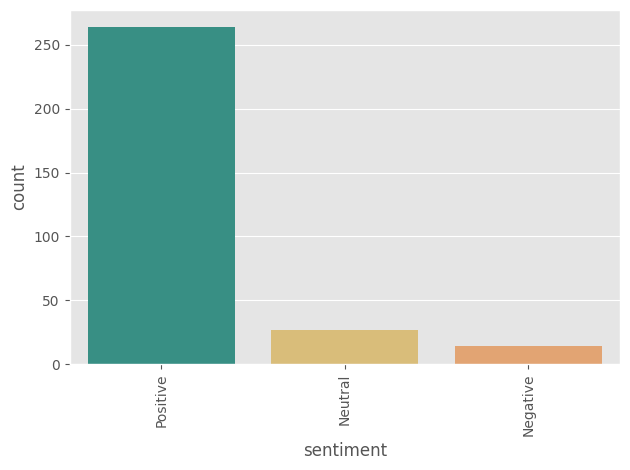

In [61]:
custom_palette = ["#2a9d8f", "#e9c46a", "#f4a261"]
ax = sns.countplot(x="sentiment", data=sent_df, palette=custom_palette)
# Rotate the x-axis labels to 90 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

In [62]:
sent_df 

,reviews,sentiment_value,word_count,sentiment
0,super light efficient laptop super light effic...,8,17,Positive
1,new laptop great far loving new look feel new ...,6,10,Positive
2,lightweight powerhouse great build quality exc...,21,25,Positive
3,great laptop work excellent laptop work proces...,6,13,Positive
4,practical solid laptop far good like hdmi usb ...,13,32,Positive
...,...,...,...,...
300,faulty motherboard dell sent laptop faulty mot...,0,7,Neutral
301,dead arrival laptop dead arrival still waiting...,-6,8,Negative
302,bad quality bad quality overheating keyboard t...,-6,8,Negative
303,hassle installation win laptop come required s...,4,10,Positive


In [63]:
sent_df.shape

(305, 4)

#### Box Plots for Outlier Detection 

<Axes: xlabel='sentiment_value', ylabel='sentiment'>

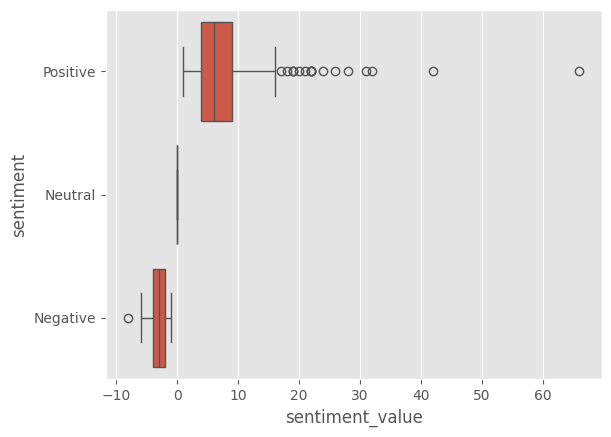

In [64]:
sns.boxplot(x=sent_df.sentiment_value,y=sent_df.sentiment)   

In [65]:
# Dropping outliers 
sent_df = sent_df[sent_df.sentiment_value <= 16] 
sent_df = sent_df[sent_df.sentiment_value >= -6] 

<Axes: xlabel='sentiment_value', ylabel='sentiment'>

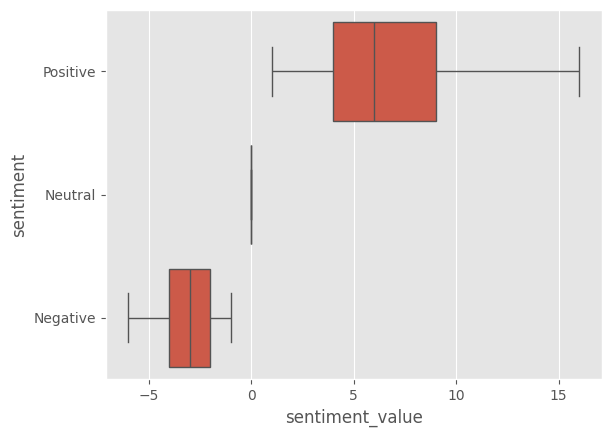

In [66]:
sns.boxplot(x=sent_df.sentiment_value,y=sent_df.sentiment)   

In [67]:
sent_df.shape 

(286, 4)

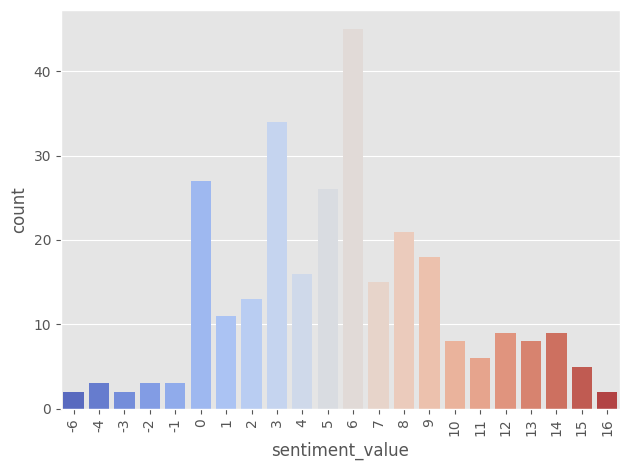

In [68]:
ax = sns.countplot(x="sentiment_value", data=sent_df, palette='coolwarm')
# Rotate the x-axis labels to 90 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

<Axes: xlabel='sentiment_value', ylabel='Density'>

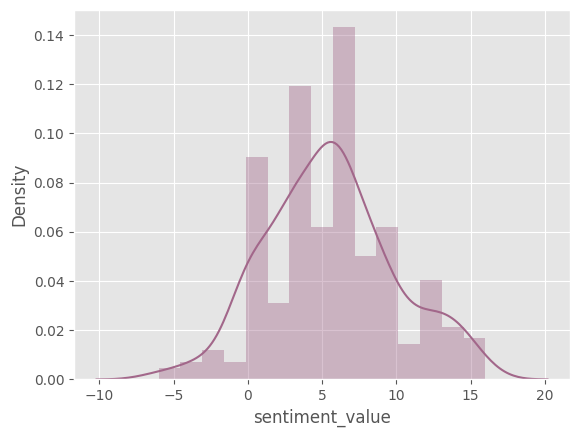

In [69]:
sns.distplot(sent_df['sentiment_value'], color = "#A2678A") 

<Axes: xlabel='None', ylabel='sentiment_value'>

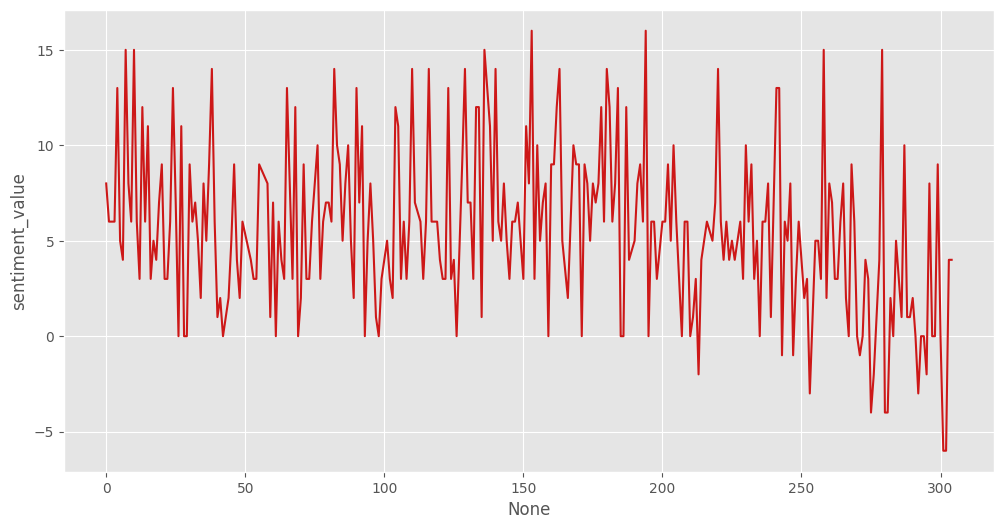

In [70]:
plt.figure(figsize=(12, 6))
sns.lineplot(y='sentiment_value',x=sent_df.index,data=sent_df, color = "#CD1818")  

### Sentence sentiment value to sentence word count

<Axes: xlabel='word_count', ylabel='sentiment_value'>

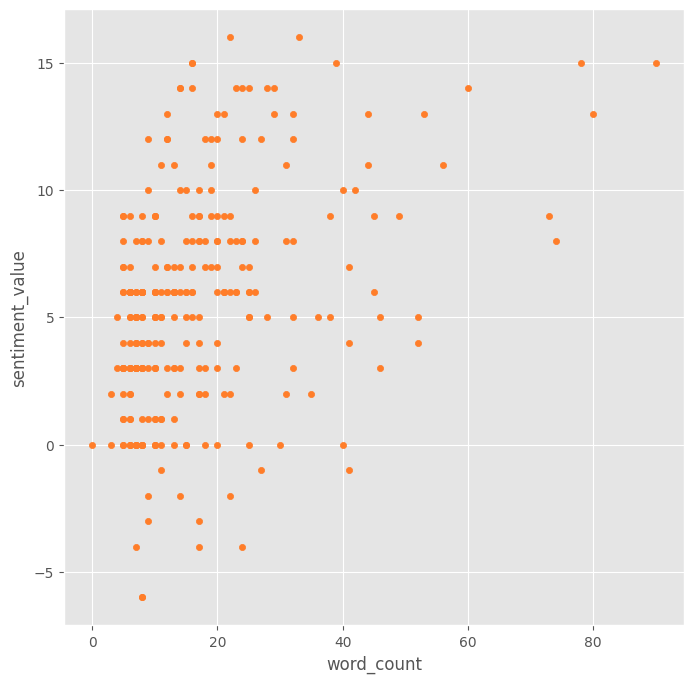

In [71]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), color = "#FF7D29") 

#### Correlation

In [71]:
sent_df.corr() 

,sentiment_value,word_count
sentiment_value,1.000000,0.389001
word_count,0.389001,1.000000


# Model Building

#### We will be using the following methods for Vectorizing our reviews column:

1. Bag of Words
2. Tf-Idf

In [72]:
sent_df.head()

,reviews,sentiment_value,word_count,sentiment
0,super light efficient laptop super light effic...,8,17,Positive
1,new laptop great far loving new look feel new ...,6,10,Positive
3,great laptop work excellent laptop work proces...,6,13,Positive
4,practical solid laptop far good like hdmi usb ...,13,32,Positive
5,good choice light weight like touch keyboard,5,7,Positive


# BAG OF WORDS (BOW)

In [73]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500, binary=True, ngram_range=(2,2)) # I want all numbers in Binary
X = cv.fit_transform(sent_df['reviews']).toarray()

In [74]:
X.shape

(286, 2500)

In [75]:
X[1]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [76]:
label_encoder = LabelEncoder()
sent_df['sentiment'] = label_encoder.fit_transform(sent_df['sentiment'])

In [77]:
sent_df['sentiment']

0      2
1      2
3      2
4      2
5      2
      ..
300    1
301    0
302    0
303    2
304    2
Name: sentiment, Length: 286, dtype: int32

In [78]:
unique_sentiments = sent_df['sentiment'].unique()
print(unique_sentiments)

[2 1 0]


In [79]:
y = sent_df['sentiment']

In [80]:
y.shape

(286,)

In [81]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Naive Bayes 

### MultinomialNB Model

In [82]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X_train, y_train)

In [83]:
#prediction
y_pred=model.predict(X_test)

In [84]:
score_MulNB=accuracy_score(y_test,y_pred)
print(score_MulNB)

0.5344827586206896


In [85]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.43      0.13      0.20        23
           2       0.55      0.88      0.67        32

    accuracy                           0.53        58
   macro avg       0.33      0.34      0.29        58
weighted avg       0.47      0.53      0.45        58



### GaussianNB Model

In [86]:
from sklearn.naive_bayes import GaussianNB
model1 = GaussianNB().fit(X_train, y_train)

In [87]:
#prediction
y_pred=model1.predict(X_test)

In [88]:
score_GauNB=accuracy_score(y_test,y_pred)
print(score_GauNB)

0.6896551724137931


In [89]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.00      0.00      0.00         2
           2       0.78      0.89      0.83        45

    accuracy                           0.69        58
   macro avg       0.26      0.30      0.28        58
weighted avg       0.61      0.69      0.65        58



### BernoulliNB Model

In [90]:
from sklearn.naive_bayes import BernoulliNB
model2 = BernoulliNB().fit(X_train, y_train)

In [91]:
#prediction
y_pred=model2.predict(X_test)

In [92]:
score_BerNB=accuracy_score(y_test,y_pred)
print(score_BerNB)

0.8620689655172413


In [93]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.98      0.88      0.93        57

    accuracy                           0.86        58
   macro avg       0.49      0.44      0.46        58
weighted avg       0.96      0.86      0.91        58



## Support Vector Machine

In [94]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [95]:
y_pred=svm_model.predict(X_test)

In [96]:
score_SVC=accuracy_score(y_test,y_pred)
print(score_SVC)

0.8793103448275862


In [97]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       1.00      0.88      0.94        58

    accuracy                           0.88        58
   macro avg       0.50      0.44      0.47        58
weighted avg       1.00      0.88      0.94        58



## Decision Trees

In [98]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [99]:
y_pred=decision_tree.predict(X_test)

In [100]:
score_DT=accuracy_score(y_test,y_pred)
print(score_DT)

0.39655172413793105


In [101]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.43      0.09      0.15        32
           2       0.39      0.83      0.53        24

    accuracy                           0.40        58
   macro avg       0.27      0.31      0.23        58
weighted avg       0.40      0.40      0.31        58



#### We have used the following models after using BagOfWords. Let's just keep the accuracies in one dataframe

In [102]:
model_acc= pd.DataFrame({'Model' : ['MultinomialNB','GaussianNB','BernoulliNB','SVM','Decision Tree'],'Accuracy' : [score_MulNB*100,score_GauNB*100,score_BerNB*100,score_SVC*100,score_DT*100]})

In [103]:
model_acc

,Model,Accuracy
0,MultinomialNB,53.448276
1,GaussianNB,68.965517
2,BernoulliNB,86.206897
3,SVM,87.931034
4,Decision Tree,39.655172


## Now let's apply Grid Search to increase the performance of the Models

In [104]:
# Define hyperparameter grids for each model
naive_bayes_param_grid = {
    'alpha': [1e-9, 0.1, 1.0]  # Hyperparameters for all Naive Bayes models
}

bernoulli_nb_grid_search = GridSearchCV(BernoulliNB(), naive_bayes_param_grid, cv=5)
multinomial_nb_grid_search = GridSearchCV(MultinomialNB(), naive_bayes_param_grid, cv=5)

svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

svm_grid_search = GridSearchCV(SVC(), svm_param_grid, cv=5)

decision_tree_param_grid = {
    'max_depth': [3, 5, 8],
    'min_samples_split': [2, 5, 10]
}

decision_tree_grid_search = GridSearchCV(DecisionTreeClassifier(), decision_tree_param_grid, cv=5)

In [105]:
# Train models with GridSearchCV
models = {
    "BernoulliNB": bernoulli_nb_grid_search,
    "MultinomialNB": multinomial_nb_grid_search,
    "SVM": svm_grid_search,
    "DecisionTree": decision_tree_grid_search
}

In [106]:
for model_name, model in models.items():
    model.fit(X_train, y_train)

In [107]:
# Print best parameters and scores for each model
for model_name, model in models.items():
    print(f"{model_name} best parameters:", model.best_params_)
    print(f"{model_name} best score:", model.best_score_)

BernoulliNB best parameters: {'alpha': 1.0}
BernoulliNB best score: 0.8553623188405798
MultinomialNB best parameters: {'alpha': 1e-09}
MultinomialNB best score: 0.6046376811594204
SVM best parameters: {'C': 0.1, 'kernel': 'linear'}
SVM best score: 0.8553623188405798
DecisionTree best parameters: {'max_depth': 3, 'min_samples_split': 2}
DecisionTree best score: 0.8466666666666667


In [108]:
# Predict on test data and evaluate performance
predictions = {}
for model_name, model in models.items():
    predictions[model_name] = model.predict(X_test)
    print(f"\n{model_name} Evaluation:")
    print(f"Accuracy:", accuracy_score(y_test, predictions[model_name]))
    print(f"Precision:", precision_score(y_test, predictions[model_name], average='weighted'))
    print(f"Recall:", recall_score(y_test, predictions[model_name], average='weighted'))
    print(f"F1-Score:", f1_score(y_test, predictions[model_name], average='weighted'))


BernoulliNB Evaluation:
Accuracy: 0.8620689655172413
Precision: 0.7713248638838476
Recall: 0.8620689655172413
F1-Score: 0.814176245210728

MultinomialNB Evaluation:
Accuracy: 0.6724137931034483
Precision: 0.8445864480347239
Recall: 0.6724137931034483
F1-Score: 0.7436781609195403

SVM Evaluation:
Accuracy: 0.8793103448275862
Precision: 0.7731866825208086
Recall: 0.8793103448275862
F1-Score: 0.8228408731414111

DecisionTree Evaluation:
Accuracy: 0.8620689655172413
Precision: 0.7713248638838476
Recall: 0.8620689655172413
F1-Score: 0.814176245210728


In [109]:
# Create empty DataFrame to store model and accuracy
model_acc_grid = pd.DataFrame(columns=["Model", "Accuracy"])

for model_name, model in models.items():
    model.fit(X_train, y_train)

    # Predict on test data
    predictions = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions) * 100

    # Create a temporary Series with model name and accuracy
    temp_series = pd.Series([model_name, accuracy], index=model_acc_grid.columns)

    # Concatenate the Series to the DataFrame (similar to append)
    model_acc_grid = pd.concat([model_acc_grid, temp_series.to_frame().T], ignore_index=True)

In [110]:
model_acc_grid

,Model,Accuracy
0,BernoulliNB,86.206897
1,MultinomialNB,67.241379
2,SVM,87.931034
3,DecisionTree,86.206897


# Term Frequency - Inverse Document Frequency (TF-IDF)

In [111]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features=2500, ngram_range=(1,2))
X_tv = tv.fit_transform(sent_df['reviews']).toarray()

In [112]:
X_tv.shape

(286, 2500)

In [113]:
y_tv = y.copy()

In [114]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tv, y_tv, test_size = 0.20, random_state = 0)

## Naive Bayes

### MultinomialNB Model

In [115]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X_train, y_train)

In [116]:
#prediction
y_pred=model.predict(X_test)

In [117]:
score_MulNB=accuracy_score(y_test,y_pred)
print(score_MulNB)

0.8793103448275862


In [118]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       1.00      0.88      0.94        58

    accuracy                           0.88        58
   macro avg       0.50      0.44      0.47        58
weighted avg       1.00      0.88      0.94        58



### GaussianNB Model

In [119]:
from sklearn.naive_bayes import GaussianNB
model1 = GaussianNB().fit(X_train, y_train)

In [120]:
#prediction
y_pred=model1.predict(X_test)

In [121]:
score_GauNB=accuracy_score(y_test,y_pred)
print(score_GauNB)

0.8620689655172413


In [122]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         0
           2       0.98      0.89      0.93        56

    accuracy                           0.86        58
   macro avg       0.33      0.30      0.31        58
weighted avg       0.95      0.86      0.90        58



### BernoulliNB Model

In [123]:
from sklearn.naive_bayes import BernoulliNB
model2 = BernoulliNB().fit(X_train, y_train)

In [124]:
#prediction
y_pred=model2.predict(X_test)

In [125]:
score_BerNB=accuracy_score(y_test,y_pred)
print(score_BerNB)

0.8620689655172413


In [126]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.98      0.88      0.93        57

    accuracy                           0.86        58
   macro avg       0.49      0.44      0.46        58
weighted avg       0.96      0.86      0.91        58



## Support Vector Machine

In [127]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [128]:
y_pred=svm_model.predict(X_test)

In [129]:
score_SVC=accuracy_score(y_test,y_pred)
print(score_SVC)

0.8793103448275862


In [130]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       1.00      0.88      0.94        58

    accuracy                           0.88        58
   macro avg       0.50      0.44      0.47        58
weighted avg       1.00      0.88      0.94        58



## Decision Tree

In [131]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [132]:
y_pred=decision_tree.predict(X_test)

In [133]:
score_DT=accuracy_score(y_test,y_pred)
print(score_DT)

0.896551724137931


In [134]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.71      0.71      0.71         7
           2       0.92      0.96      0.94        49

    accuracy                           0.90        58
   macro avg       0.55      0.56      0.55        58
weighted avg       0.86      0.90      0.88        58



#### Now let's arrange the accuracies in the dataframe

In [135]:
model_acc_tv = pd.DataFrame({'Model' : ['MultinomialNB','GaussianNB','BernoulliNB','SVM','Decision Tree'],'Accuracy' : [score_MulNB*100,score_GauNB*100,score_BerNB*100,score_SVC*100,score_DT*100]})

In [136]:
model_acc_tv

,Model,Accuracy
0,MultinomialNB,87.931034
1,GaussianNB,86.206897
2,BernoulliNB,86.206897
3,SVM,87.931034
4,Decision Tree,89.655172


## Now let's perform Grid Search on the Models

In [137]:
# Define hyperparameter grids for each model
naive_bayes_param_grid = {
    'alpha': [1e-9, 0.1, 1.0]  # Hyperparameters for all Naive Bayes models
}

bernoulli_nb_grid_search = GridSearchCV(BernoulliNB(), naive_bayes_param_grid, cv=5)
multinomial_nb_grid_search = GridSearchCV(MultinomialNB(), naive_bayes_param_grid, cv=5)

svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

svm_grid_search = GridSearchCV(SVC(), svm_param_grid, cv=5)

decision_tree_param_grid = {
    'max_depth': [3, 5, 8],
    'min_samples_split': [2, 5, 10]
}

decision_tree_grid_search = GridSearchCV(DecisionTreeClassifier(), decision_tree_param_grid, cv=5)

In [138]:
# Train models with GridSearchCV
models = {
    "BernoulliNB": bernoulli_nb_grid_search,
    "MultinomialNB": multinomial_nb_grid_search,
    "SVM": svm_grid_search,
    "DecisionTree": decision_tree_grid_search
}

In [139]:
for model_name, model in models.items():
    model.fit(X_train, y_train)

In [140]:
# Print best parameters and scores for each model
for model_name, model in models.items():
    print(f"{model_name} best parameters:", model.best_params_)
    print(f"{model_name} best score:", model.best_score_)

BernoulliNB best parameters: {'alpha': 1e-09}
BernoulliNB best score: 0.8640579710144927
MultinomialNB best parameters: {'alpha': 1.0}
MultinomialNB best score: 0.8553623188405798
SVM best parameters: {'C': 0.1, 'kernel': 'linear'}
SVM best score: 0.8553623188405798
DecisionTree best parameters: {'max_depth': 3, 'min_samples_split': 5}
DecisionTree best score: 0.8247342995169081


In [141]:
# Predict on test data and evaluate performance
predictions = {}
for model_name, model in models.items():
    predictions[model_name] = model.predict(X_test)
    print(f"\n{model_name} Evaluation:")
    print(f"Accuracy:", accuracy_score(y_test, predictions[model_name]))
    print(f"Precision:", precision_score(y_test, predictions[model_name], average='weighted'))
    print(f"Recall:", recall_score(y_test, predictions[model_name], average='weighted'))
    print(f"F1-Score:", f1_score(y_test, predictions[model_name], average='weighted'))


BernoulliNB Evaluation:
Accuracy: 0.8620689655172413
Precision: 0.9040752351097179
Recall: 0.8620689655172413
F1-Score: 0.8431197137280416

MultinomialNB Evaluation:
Accuracy: 0.8793103448275862
Precision: 0.7731866825208086
Recall: 0.8793103448275862
F1-Score: 0.8228408731414111

SVM Evaluation:
Accuracy: 0.8793103448275862
Precision: 0.7731866825208086
Recall: 0.8793103448275862
F1-Score: 0.8228408731414111

DecisionTree Evaluation:
Accuracy: 0.8620689655172413
Precision: 0.7713248638838476
Recall: 0.8620689655172413
F1-Score: 0.814176245210728


In [142]:
# Create empty DataFrame to store model and accuracy
model_acc_grid_tv = pd.DataFrame(columns=["Model", "Accuracy"])

for model_name, model in models.items():
    model.fit(X_train, y_train)

    # Predict on test data
    predictions = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions) * 100

    # Create a temporary Series with model name and accuracy
    temp_series = pd.Series([model_name, accuracy], index=model_acc_grid_tv.columns)

    # Concatenate the Series to the DataFrame (similar to append)
    model_acc_grid_tv = pd.concat([model_acc_grid_tv, temp_series.to_frame().T], ignore_index=True)

In [143]:
model_acc_grid_tv

,Model,Accuracy
0,BernoulliNB,86.206897
1,MultinomialNB,87.931034
2,SVM,87.931034
3,DecisionTree,86.206897


# FINAL VERDICT

#### 1. Accuracies of Model with Bag of Words (Without Hyperparameter tuning)

In [144]:
model_acc

,Model,Accuracy
0,MultinomialNB,53.448276
1,GaussianNB,68.965517
2,BernoulliNB,86.206897
3,SVM,87.931034
4,Decision Tree,39.655172


#### 2. Accuracies of Model with Bag of Words (With Hyperparameter tuning)

In [145]:
model_acc_grid

,Model,Accuracy
0,BernoulliNB,86.206897
1,MultinomialNB,67.241379
2,SVM,87.931034
3,DecisionTree,86.206897


#### 3. Accuracies of Model with TFIDF (Without Hyperparameter tuning)

In [146]:
model_acc_tv

,Model,Accuracy
0,MultinomialNB,87.931034
1,GaussianNB,86.206897
2,BernoulliNB,86.206897
3,SVM,87.931034
4,Decision Tree,89.655172


#### 4. Accuracies of Model with TFIDF (With Hyperparameter tuning)

In [147]:
model_acc_grid_tv

,Model,Accuracy
0,BernoulliNB,86.206897
1,MultinomialNB,87.931034
2,SVM,87.931034
3,DecisionTree,86.206897
